# Files and Exception Handling

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/python/07_files.ipynb)

## Overview

This lecture introduces techniques for working with files and handling exceptions in Python, focusing on their importance in geospatial programming. Managing files effectively is crucial when reading, writing, or processing geospatial data. Exception handling is equally important as it allows your programs to gracefully manage errors, ensuring that your code remains robust and reliable even in the face of unexpected issues.

## Learning Objectives

By the end of this lecture, you should be able to:

- Read from and write to files in Python, with a particular focus on handling geospatial data.
- Implement exception handling using `try`, `except`, and `finally` blocks to manage errors that may occur during file operations.
- Combine file handling and exception handling to create robust and reliable geospatial applications.
- Develop the skills to identify and manage common issues in file processing, such as missing files, corrupt data, or formatting errors.
- Ensure that your geospatial programs can handle real-world data scenarios effectively by using best practices for file and exception handling.

## Creating a Sample File

Before working with files, it's essential to ensure that the files you intend to process actually exist. In this section, you'll learn how to create a sample `coordinates.txt` file programmatically. This file will be used in subsequent examples.

In [1]:
# Create a sample coordinates.txt file
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

output_file = "coordinates.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

Sample file 'coordinates.txt' has been created successfully.


In this code, we create a simple text file named `coordinates.txt` containing latitude and longitude pairs for several cities around the world. The file is written in the current working directory.

After running this script, the `coordinates.txt` file will be available for use in the following examples. If any issues occur during the file creation process, the script will handle them and print an error message.

## Working with Files

In geospatial programming, you often need to read from or write to files. Python provides built-in functions to handle these tasks. Let's start by reading from a text file containing coordinates and writing the results to a new file.

In [2]:
# Example of reading coordinates from a file and writing to another file
input_file = "coordinates.txt"
output_file = "output_coordinates.txt"

try:
    with open(input_file, "r") as infile:
        coordinates = infile.readlines()

    with open(output_file, "w") as outfile:
        for line in coordinates:
            lat, lon = line.strip().split(",")
            outfile.write(f"Latitude: {lat}, Longitude: {lon}\n")

    print(f"Coordinates have been written to {output_file}")
except FileNotFoundError:
    print(f"Error: The file {input_file} was not found.")

Coordinates have been written to output_coordinates.txt


## Exception Handling

Exception handling allows you to handle errors that occur during the execution of your program. This is especially important in geospatial programming, where you may encounter issues such as missing files, corrupt data, or invalid input.

Let's explore how to handle different types of exceptions using `try`, `except`, and `finally`.

In [3]:
# Example of exception handling when parsing coordinates
def parse_coordinates(line):
    try:
        lat, lon = line.strip().split(",")
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    except ValueError as e:
        print(f"Error: {e}. Could not parse line: {line.strip()}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


# Example usage
line = "invalid data"
coordinates = parse_coordinates(line)
if coordinates:
    print(f"Parsed coordinates: {coordinates}")

Error: not enough values to unpack (expected 2, got 1). Could not parse line: invalid data


## Combining File Handling and Exception Handling

You can combine file handling and exception handling to create robust geospatial applications. This allows you to ensure that files are properly handled even if errors occur during the process.

In [4]:
# Example of robust file handling with exceptions
def process_geospatial_file(input_file):
    try:
        with open(input_file, "r") as infile:
            for line in infile:
                coordinates = parse_coordinates(line)
                if coordinates:
                    print(f"Processed coordinates: {coordinates}")
    except FileNotFoundError:
        print(f"Error: The file {input_file} was not found.")
    except Exception as e:
        print(f"An unexpected error occurred while processing the file: {e}")
    finally:
        print(f"Finished processing {input_file}")


# Example usage
process_geospatial_file("coordinates.txt")

Processed coordinates: (35.6895, 139.6917)
Processed coordinates: (34.0522, -118.2437)
Processed coordinates: (51.5074, -0.1278)
Processed coordinates: (-33.8688, 151.2093)
Processed coordinates: (48.8566, 2.3522)
Finished processing coordinates.txt


## Reading GeoJSON Data from a URL

In geospatial programming, it's common to access datasets hosted online. For instance, we may need to read GeoJSON data directly from a URL. Python's requests library makes it easy to retrieve such data. In this example, we'll read a GeoJSON file containing U.S. cities and handle any exceptions that may arise.

First, ensure you have the requests library installed. Uncomment and run the following command if you haven't already installed it.

In [ ]:
# !pip install requests

Import the required libraries and read the GeoJSON data from the URL.

In [5]:
import requests

In this case, we will read the GeoJSON data for world cities hosted at https://github.com/opengeos/datasets/releases/tag/world, and process it to extract the names and coordinates of the cities.

In [6]:
url = (
    "https://github.com/opengeos/datasets/releases/download/world/world_cities.geojson"
)

Let's define a function to read the GeoJSON data from the URL and extract the city names and coordinates. We'll also handle any exceptions that may occur during the process.

In [7]:
def fetch_geojson(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raises an exception for HTTP errors
        geojson_data = response.json()  # Parse the JSON response
        return geojson_data
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.ConnectionError as conn_err:
        print(f"Error connecting to the server: {conn_err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    return None


# Fetch and print a summary of the data
geojson_data = fetch_geojson(url)

Uncomment and run the following code to display the data read from the URL.

In [8]:
geojson_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [32.5333, 0.5833]},
   'properties': {'id': 1,
    'name': 'Bombo',
    'country': 'UGA',
    'latitude': 0.5833,
    'longitude': 32.5333,
    'population': 75000}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [30.275, 0.671]},
   'properties': {'id': 2,
    'name': 'Fort Portal',
    'country': 'UGA',
    'latitude': 0.671,
    'longitude': 30.275,
    'population': 42670}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [15.799, 40.642]},
   'properties': {'id': 3,
    'name': 'Potenza',
    'country': 'ITA',
    'latitude': 40.642,
    'longitude': 15.799,
    'population': 69060}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [14.656, 41.563]},
   'properties': {'id': 4,
    'name': 'Campobasso',
    'country': 'ITA',
    'latitude': 41.563,
    'longitude': 14.656,
    'population': 50762}},
  {'t

The output above is lengthy, so we'll only display the first few cities. You can modify the code to display more cities if needed.

In [9]:
if geojson_data:
    features = geojson_data.get("features", [])
    print(f"Number of cities: {len(features)}")

    # Extract city ids and their coordinates
    for feature in features[:5]:  # Display first 5 cities
        city_name = feature["properties"].get("name")
        country_name = feature["properties"].get("country")
        coordinates = feature["geometry"]["coordinates"]
        print(f"Name: {city_name}, Country: {country_name}, Coordinates: {coordinates}")

Number of cities: 1249
Name: Bombo, Country: UGA, Coordinates: [32.5333, 0.5833]
Name: Fort Portal, Country: UGA, Coordinates: [30.275, 0.671]
Name: Potenza, Country: ITA, Coordinates: [15.799, 40.642]
Name: Campobasso, Country: ITA, Coordinates: [14.656, 41.563]
Name: Aosta, Country: ITA, Coordinates: [7.315, 45.737]


## Exercises

1. Create a function that reads a file containing a list of city names and their coordinates. The function should handle exceptions if the file is missing or if a line in the file is not properly formatted.
2. Write a function that writes a list of coordinates to a file. Include exception handling to ensure that the file is properly closed even if an error occurs during writing.
3. Create a robust geospatial data processing function that reads data from a file, processes it, and writes the results to another file. Ensure that all potential errors are handled appropriately.

In [10]:
import geopandas as gpd

# Path to your GeoJSON file
geojson_path = r"C:\data\tuco.geojson"

# Load the GeoJSON into a GeoDataFrame
gdf = gpd.read_file(geojson_path)

# Print basic information about the data
print(gdf.head())  # Show first few rows
print("\nCRS:", gdf.crs)  # Show coordinate reference system
print("\nColumns:", gdf.columns)  # List available attributes
print("\nGeometry Type:", gdf.geom_type.unique())  # Check if it's a Point, Line, or Polygon


     GEOID                                          NAME    variable   
0  0648641                    Mono Vista CDP, California  B01003_001  \
1  0675322  Strawberry CDP (Tuolumne County), California  B01003_001   
2  0613182                  Chinese Camp CDP, California  B01003_001   
3  0614904                      Columbia CDP, California  B01003_001   
4  0621188                   East Sonora CDP, California  B01003_001   

   estimate    moe STATEFP COUNTYFP  COUNTYNS        AFFGEOID GEOID_1   
0    3696.0  671.0      06      109  00277319  0500000US06109   06109  \
1      65.0   71.0      06      109  00277319  0500000US06109   06109   
2      61.0   69.0      06      109  00277319  0500000US06109   06109   
3    2645.0  449.0      06      109  00277319  0500000US06109   06109   
4    2823.0  413.0      06      109  00277319  0500000US06109   06109   

     NAME_1         NAMELSAD STUSPS  STATE_NAME LSAD         ALAND   
0  Tuolumne  Tuolumne County     CA  California   06  5.75

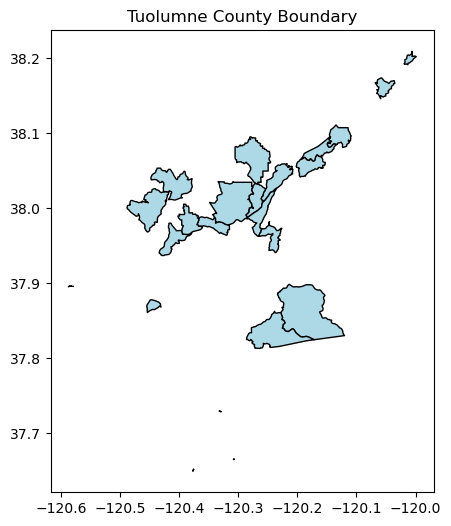

In [11]:
import matplotlib.pyplot as plt

# Plot the GeoJSON file
gdf.plot(figsize=(8, 6), edgecolor="black", color="lightblue")
plt.title("Tuolumne County Boundary")
plt.show()


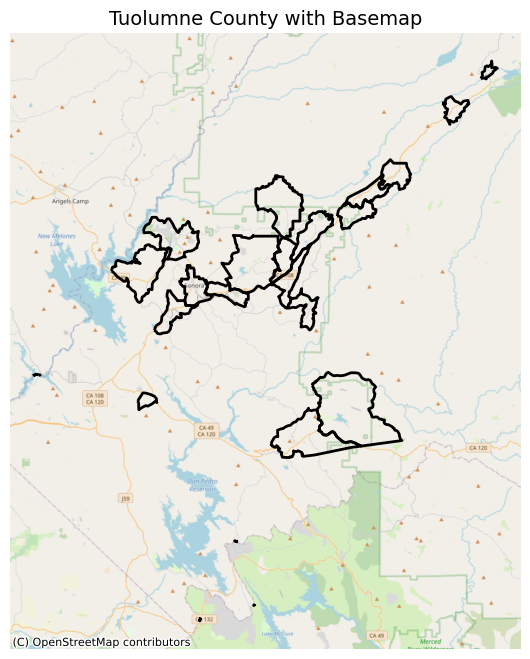

In [12]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Path to your GeoJSON file
geojson_path = r"C:\data\tuco.geojson"

# Load GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(geojson_path)

# Ensure it's in a projected CRS for contextily (Web Mercator EPSG:3857)
gdf = gdf.to_crs(epsg=3857)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoJSON boundary
gdf.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=2)

# Add a basemap (satellite, street map, etc.)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize the map
ax.set_title("Tuolumne County with Basemap", fontsize=14)
ax.set_axis_off()  # Hide axis labels

# Show the plot
plt.show()


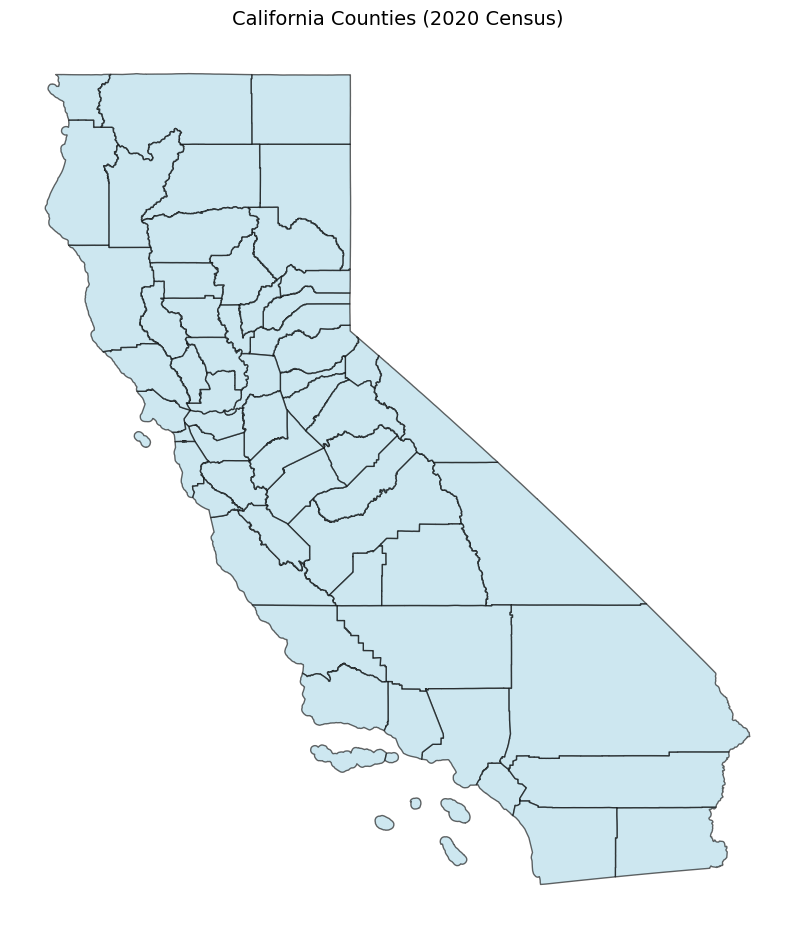

In [14]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

# Census Bureau API endpoint for 2020 county boundaries
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/82/query"

# Parameters to get only California counties (STATE='06')
params = {
    "where": "STATE='06'",  # California's FIPS code is '06'
    "outFields": "*",
    "f": "geojson"
}

# Fetch county data from the Census API
response = requests.get(url, params=params)

if response.status_code == 200:
    county_data = response.json()
    
    # Load into a GeoDataFrame
    counties = gpd.GeoDataFrame.from_features(county_data["features"])
    
    # Ensure CRS is set
    counties = counties.set_crs(epsg=4326)

    # Plot the counties
    fig, ax = plt.subplots(figsize=(10, 12))
    counties.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.6)
    ax.set_title("California Counties (2020 Census)", fontsize=14)
    ax.set_axis_off()  # Hide axis labels
    plt.show()
else:
    print("❌ Error fetching county data:", response.status_code)


In [15]:
# Save as a shapefile
counties.to_file("C:/data/california_counties.shp", driver="ESRI Shapefile")
print("✅ California counties saved as a shapefile!")


✅ California counties saved as a shapefile!


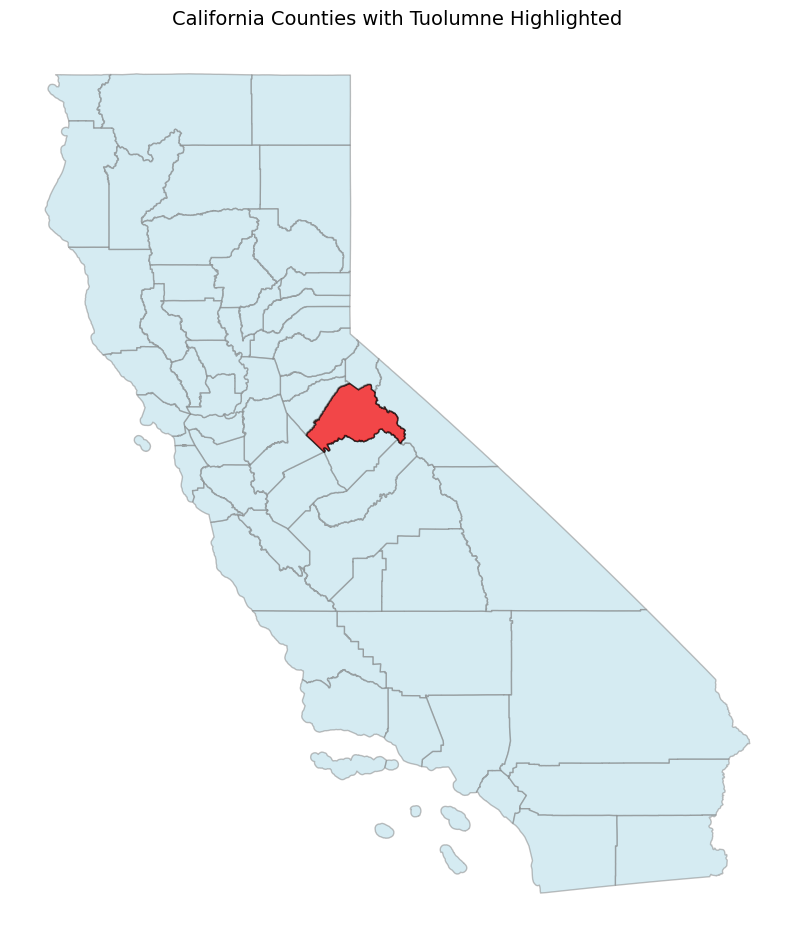

In [17]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

# Census Bureau API endpoint for 2020 county boundaries
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/82/query"

# Parameters to get only California counties (STATE='06')
params = {
    "where": "STATE='06'",  # California's FIPS code is '06'
    "outFields": "*",
    "f": "geojson"
}

# Fetch county data from the Census API
response = requests.get(url, params=params)

if response.status_code == 200:
    county_data = response.json()
    
    # Load into a GeoDataFrame
    counties = gpd.GeoDataFrame.from_features(county_data["features"])
    
    # Ensure CRS is set
    counties = counties.set_crs(epsg=4326)

    # Find Tuolumne County (FIPS Code: 109)
    tuolumne = counties[counties["COUNTY"] == "109"]

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 12))

    # Plot all counties
    counties.plot(ax=ax, edgecolor="gray", facecolor="lightblue", alpha=0.5)

    # Highlight Tuolumne County
    tuolumne.plot(ax=ax, edgecolor="black", facecolor="red", alpha=0.7)

    # Add title
    ax.set_title("California Counties with Tuolumne Highlighted", fontsize=14)
    ax.set_axis_off()

    plt.show()

else:
    print("❌ Error fetching county data:", response.status_code)


## Summary

Working with files and handling exceptions are critical skills in geospatial programming. By mastering these techniques, you can create more reliable and efficient geospatial applications that handle real-world data gracefully.